In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KernelDensity

Parametric estimation

In [8]:
# first dataset
test_data_1 = pd.DataFrame(data=sp.stats.norm.rvs(loc=5, scale=0.2, size=20, random_state=7), columns=["X"])
test_data_1.head()

,X
0,5.338105
1,4.906813
2,5.006564
3,5.081503
4,4.842215


In [10]:
# second dataset
x = sp.stats.uniform.rvs(loc=-2, scale=10, size=250, random_state=34)
y = 2*x - 5 + sp.stats.norm.rvs(loc=0, scale=2, size=250, random_state=13)
test_data_2 = pd.DataFrame(data=np.array([x, y]).T, columns=["X", "Y"])
test_data_2.head()

,X,Y
0,-1.614383,-9.653548
1,5.801005,8.109542
2,-1.072962,-7.234931
3,4.328927,4.561478
4,-1.861092,-6.031980


Expected value estimation

In [12]:
def mean_estimation(data, alpha, population_std="unknown"):
    n=len(data)
    n
    suma=sum(data['X'])
    estymator_wartosci_oczekiwanej=(1/n)*suma
    if population_std != "unknown":
        indeks_u=(1-alpha/2)
        wartosc_u=sp.stats.norm.ppf(indeks_u)
        dolny_przedzial=(estymator_wartosci_oczekiwanej - ( wartosc_u)*population_std/np.sqrt(n) )
        gorny_przedzial=(estymator_wartosci_oczekiwanej + (wartosc_u)*population_std/np.sqrt(n) )
        poziom_ufnosci=1-alpha
        print(f"μ belongs in the range [{dolny_przedzial:.4f}, {gorny_przedzial:.4f}] assuming confidence level {poziom_ufnosci:.4f}")
        return dolny_przedzial, gorny_przedzial
    else:
        x=data['X']
        suma1=0
        for xi in x:
            suma1 += (xi - estymator_wartosci_oczekiwanej) ** 2
        ss= np.sqrt((1/n) * suma1)
        indeks1=(1-alpha/2)
        wartosc_t=sp.stats.t.ppf(indeks1,n-1)
        dolny_przedzial1=(estymator_wartosci_oczekiwanej-(wartosc_t)*ss/np.sqrt(n-1))
        gorny_przedzial1=(estymator_wartosci_oczekiwanej+(wartosc_t)*ss/np.sqrt(n-1))
        poziom_ufnosci1=1-alpha
        print(f"μ belongs in the range [{dolny_przedzial1:.4f}, {gorny_przedzial1:.4f}] assuming confidence level {poziom_ufnosci1:.4f}")
        return dolny_przedzial1, gorny_przedzial1
    
    
mean_estimation(test_data_1,0.1,0.2)
mean_estimation(test_data_1,0.05,0.2)
mean_estimation(test_data_1,0.02,0.2)


mean_estimation(test_data_1, 0.1)
mean_estimation(test_data_1, 0.05)
mean_estimation(test_data_1, 0.02)

μ belongs in the range [4.9056, 5.0527] assuming confidence level 0.9000
μ belongs in the range [4.8915, 5.0668] assuming confidence level 0.9500
μ belongs in the range [4.8751, 5.0832] assuming confidence level 0.9800
μ belongs in the range [4.9134, 5.0450] assuming confidence level 0.9000
μ belongs in the range [4.8995, 5.0589] assuming confidence level 0.9500
μ belongs in the range [4.8825, 5.0759] assuming confidence level 0.9800


(4.882508507351398, 5.07585111255546)

Estimation of variance

In [13]:
def variance_estimation(data, alpha, population_mean="unknown"):
    S=0 
    var_low=0
    var_high=0
    Z = 1 - alpha
    n = len(data)
    mean=0
    x = data['X']
    x_mean = data['X'].mean()
    
    #first - expected value that we have
    if population_mean != "unknown":
        mean = population_mean
        suma=0
        for xi in x:
            suma += (xi - mean)**2
        S = 1/n * suma
        chi2_x  = sp.stats.chi2.ppf((1-(alpha/2)), n-1)
        chi2_y =  sp.stats.chi2.ppf((alpha/2), n-1)
        var_low = n*S/chi2_x
        var_high = n*S/chi2_y

    # expected value
    else: 
        # variation
        S = np.var(x, ddof=1)
        chi2_x  = sp.stats.chi2.ppf((1-(alpha/2)), n-1)
        chi2_y =  sp.stats.chi2.ppf((alpha/2), n-1)
        
        var_low = (n-1)*S/chi2_x
        var_high = (n-1)*S/chi2_y
        

    print(f"𝜎^2 belongs in the range [{var_low:.4f}, {var_high:.4f}], assuming confidence level 1-𝛼 = {Z}")
    return (var_low, var_high)


#variance_estimation(test_data_1, 0.1, population_mean=5)

variance_estimation(test_data_1, 0.1)

𝜎^2 belongs in the range [0.0183, 0.0544], assuming confidence level 1-𝛼 = 0.9


(0.018268125369359626, 0.05442967510189219)

 Estimation of Linear Regression Equation Coefficients

In [15]:
def linear_regression_coefficients_estimation(data, alpha):
    X = data['X']
    y = data['Y']
    n = len(data)

    X_mean = np.mean(X)
    y_mean = np.mean(y)

    # Calculating a
    a_licznik = np.sum((X - X_mean) * (y - y_mean))
    a_mianownik = np.sum((X - X_mean) ** 2)
    a = a_licznik / a_mianownik

    # Calculating b
    b = y_mean - a * X_mean

    y_hat = a * X + b

    estymator = 1 / (n - 2) * np.sum((y - y_hat) ** 2)
    est = np.sqrt(estymator)
    D_b_licznik = np.sum(X ** 2)
    D_b_mianownik =  np.sum((X - X_mean) ** 2)
    D_b = est * np.sqrt(D_b_licznik /(n* D_b_mianownik))

    D_a_mianownik = np.sum((X - X_mean) ** 2)
    D_a = est / np.sqrt(D_a_mianownik)

    dof = n - 2  #
    t_critical = sp.stats.t.ppf(1 - alpha / 2, dof)
    a_low = a - t_critical * D_a
    a_high = a + t_critical * D_a
    a_ci = (a_low, a_high)

    b_low = b - t_critical * D_b
    b_high = b + t_critical * D_b
    b_ci = (b_low, b_high)
    print(f"r belongs in range [{b_low:.4f}, {b_high:.4f}] assuming confidence leveli 1-𝛼 = {1-alpha}")
    
    return a_ci, b_ci

linear_regression_coefficients_estimation(test_data_2, 0.05)
linear_regression_coefficients_estimation(test_data_2, 0.1)

r belongs in range [-5.3827, -4.7442] assuming confidence leveli 1-𝛼 = 0.95
r belongs in range [-5.3310, -4.7958] assuming confidence leveli 1-𝛼 = 0.9


((1.9033093214381904, 2.0244570616522926),
 (-5.331039505544367, -4.795829126494772))

Nonparametric estimation

In [2]:
# data
sample = pd.DataFrame(data=np.concatenate([sp.stats.norm.rvs(loc=4, scale=0.2, size=45, random_state=7), sp.stats.norm.rvs(loc=5.5, scale=0.4, size=85, random_state=2159)]), columns=["X"])
sample.head()

,X
0,4.338105
1,3.906813
2,4.006564
3,4.081503
4,3.842215


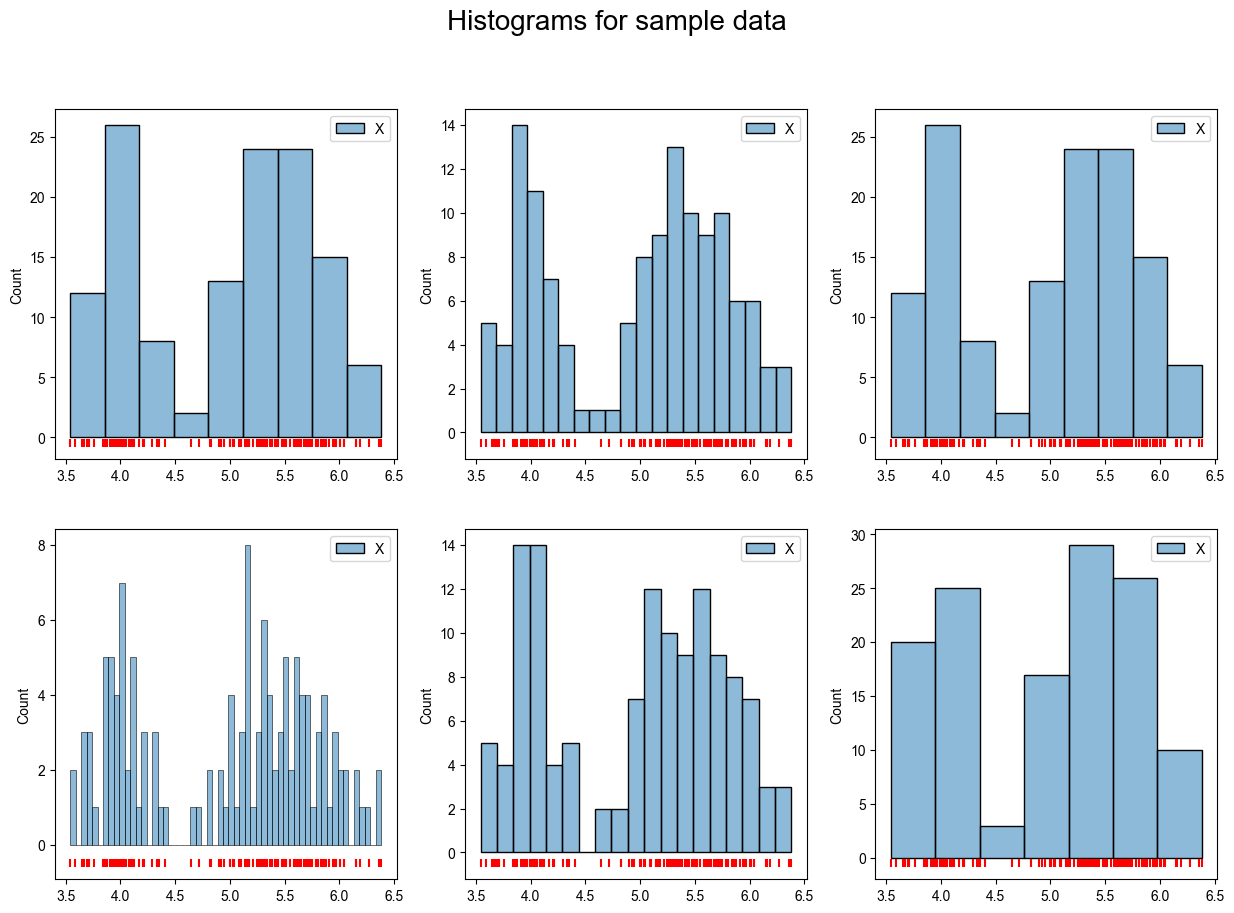

In [3]:
# Histogram

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

sns.histplot(data=sample, ax=axes[0,0])
axes[0,0].scatter(sample["X"], np.full_like(sample["X"], -0.5), marker='|', color='red')

# number of intervals - 20
sns.histplot(data=sample, bins=20, ax=axes[0,1])
axes[0,1].scatter(sample["X"], np.full_like(sample["X"], -0.5), marker='|', color='red')

# width of intervals
sns.histplot(data=sample, binwidth=0.3, ax=axes[0,2])
axes[0,2].scatter(sample["X"], np.full_like(sample["X"], -0.5), marker='|', color='red')

# boundaries of intervals 2 to 8 with a step of 0.05
bin_width1 = 0.05
num_bins1 = int((8 - 2) / bin_width1)
sns.histplot(data=sample,  bins=num_bins1, binwidth=bin_width1, ax=axes[1,0])
axes[1,0].scatter(sample["X"], np.full_like(sample["X"], -0.5), marker='|', color='red')

# boundaries of intervals 2 to 8 with a step of 0.15
bin_width2 = 0.15
num_bins2 = int((8 - 2) / bin_width2)
sns.histplot(data=sample,  bins=num_bins2, binwidth=bin_width2, ax=axes[1,1])
axes[1,1].scatter(sample["X"], np.full_like(sample["X"], -0.5), marker='|', color='red')

# boundaries of intervals 2 to 8 with a step of 0.4
bin_width3 = 0.4
num_bins3 = int((8 - 2) / bin_width3)
sns.histplot(data=sample, bins=num_bins3, binwidth=bin_width3, ax=axes[1,2])
axes[1,2].scatter(sample["X"], np.full_like(sample["X"], -0.5), marker='|', color='red')

fig.suptitle("Histograms for sample data", size=20)
sns.set_style("white")

Estimation with a nuclear function

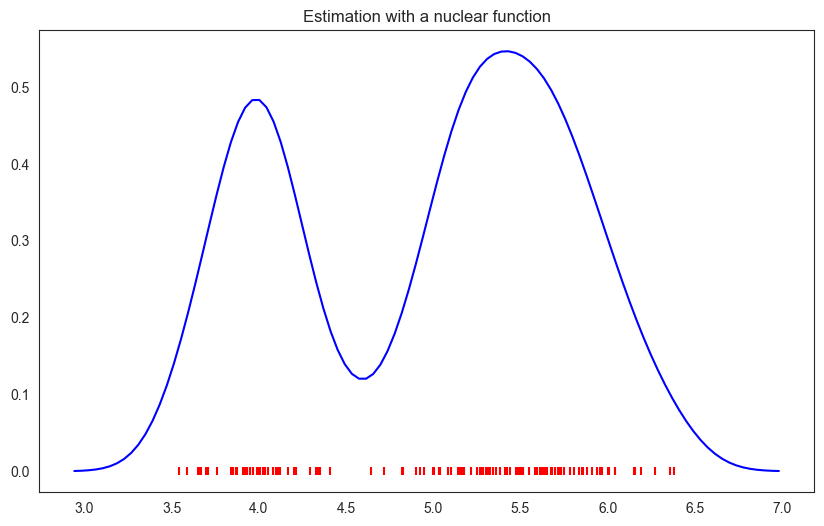

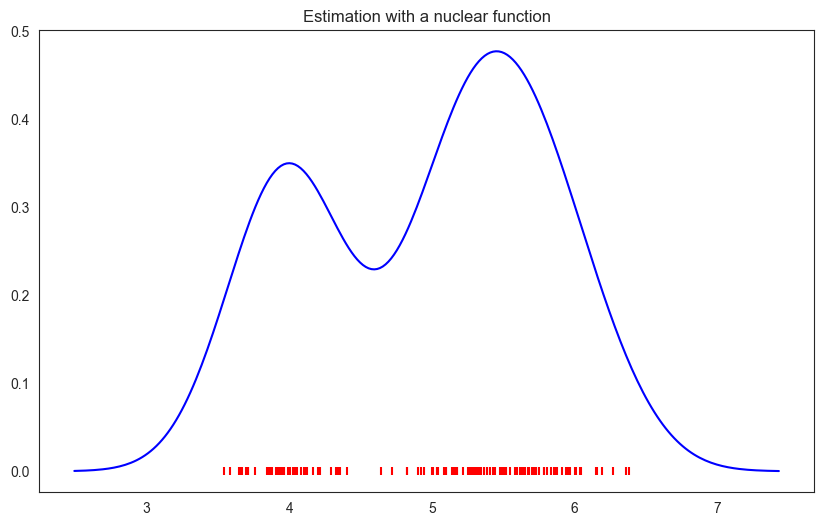

,X,KDE
0,2.492337,0.000388
1,2.512174,0.000469
2,2.532011,0.000563
3,2.551848,0.000676
4,2.571685,0.000808
...,...,...
245,7.352412,0.000547
246,7.372249,0.000461
247,7.392086,0.000386
248,7.411924,0.000323


In [5]:
def simple_kde_estimation(data, estimation_points, sigma):
    data_values = data['X'].values
    
    min_val = data_values.min()
    max_val = data_values.max()
    values = np.linspace(min_val - 3 * sigma, max_val + 3 * sigma, estimation_points)
    estimated_values = []
    
    # Calculating estimated values
    for val in values:
        pdf_values = sp.stats.norm.pdf(data_values, loc=val, scale=sigma)
        fi = np.sum(pdf_values)
        estimated_values.append(fi)

    # Calculating step: 
    di = values[1] - values[0]
    
    # Calculating the area under the function
    pole_pod_funkcja = np.sum(np.array(estimated_values) * di)
    
    # Standardization of estimated values
    standardized_values = np.array(estimated_values) / pole_pod_funkcja
    
    # DataFrame'u with results
    cdf = pd.DataFrame({'X': values, 'KDE': standardized_values})
    #cdf.sort_values(by='X', inplace=True)
    plt.figure(figsize=(10, 6))
    plt.plot(cdf['X'], cdf['KDE'], color='blue')
    plt.scatter(data_values, np.full_like(data_values, 0), marker='|', color='red')
    plt.title('Estimation with a nuclear function')
    
    plt.show()
    return cdf
    
test_results_1 = simple_kde_estimation(sample, 100, sigma=0.2)
test_results_1
test_results_2 = simple_kde_estimation(sample, estimation_points=250, sigma=0.35)
test_results_2

Estimation based on distribution

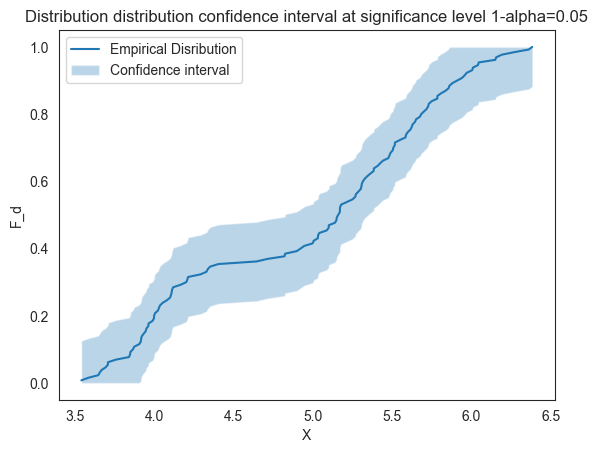

,X,F_d,F_d_min,F_d_max
27,3.542337,0.007692,0.000000,0.125445
34,3.587117,0.015385,0.000000,0.133138
7,3.649055,0.023077,0.000000,0.140830
44,3.658332,0.030769,0.000000,0.148522
32,3.669785,0.038462,0.000000,0.156215
...,...,...,...,...
100,6.154922,0.969231,0.851478,1.000000
53,6.190435,0.976923,0.859170,1.000000
87,6.271357,0.984615,0.866862,1.000000
93,6.359798,0.992308,0.874555,1.000000


In [7]:
def cdf_estimation(data, alpha):
    # Sorting the data
    sorted_data = data.sort_values(by='X')
    
    # Counting number of observations
    n = len(sorted_data)
    
    # Empirical Distribution
    sorted_data['F_d'] = np.arange(1, n + 1) / n

    # Calculation of the value of the Kolmogorov-Smirnov statistic
    k_s = sp.stats.kstwo.ppf(1-alpha, n)

    sorted_data['F_d_min'] = np.maximum(0, sorted_data['F_d'] - k_s)

    sorted_data['F_d_max'] = np.minimum(1, sorted_data['F_d'] + k_s)

    plt.plot(sorted_data['X'], sorted_data['F_d'])
    plt.fill_between(sorted_data['X'], sorted_data['F_d_min'], sorted_data['F_d_max'], alpha=0.3)
    plt.title(f'Distribution distribution confidence interval at significance level 1-alpha={alpha}')
    plt.xlabel('X')
    plt.ylabel('F_d')
    plt.legend(['Empirical Disribution', "Confidence interval"])
    plt.grid(False)
    plt.show()
 
    return sorted_data[['X', 'F_d', 'F_d_min', 'F_d_max']]

test_results_3 = cdf_estimation(sample, 0.05)
test_results_3
#test_results_4 = cdf_estimation(sample, 0.02)
#test_results_4.min()

